In [1]:
import numpy as np
import matplotlib.pyplot as plt

Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])
Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])
N = 9

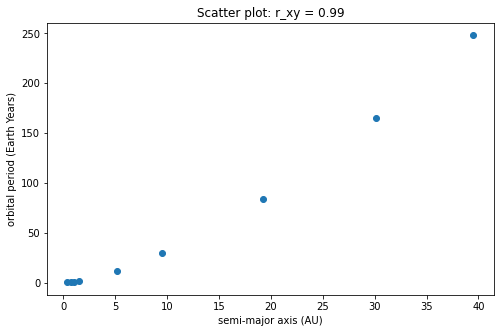

In [2]:
corr = np.corrcoef(Xs, Ys).flatten()[1]

fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('white')
plt.scatter(Xs, Ys)
plt.xlabel('semi-major axis (AU)')
plt.ylabel('orbital period (Earth Years)')
plt.title(f'Scatter plot: r_xy = {corr:.2f}')
plt.show()

In [3]:
### betas calculation

beta_1 = corr*(np.std(Ys, ddof=1)/np.std(Xs, ddof=1))
beta_0 = np.mean(Ys) - beta_1*np.mean(Xs)

y_hat = beta_1*Xs + beta_0
residuals = Ys - y_hat

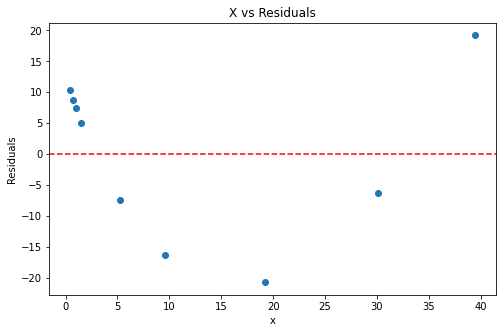

In [4]:
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('white')
plt.scatter(Xs, residuals)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title(f'X vs Residuals')
plt.axhline(0, c='r', linestyle='--')
plt.show()

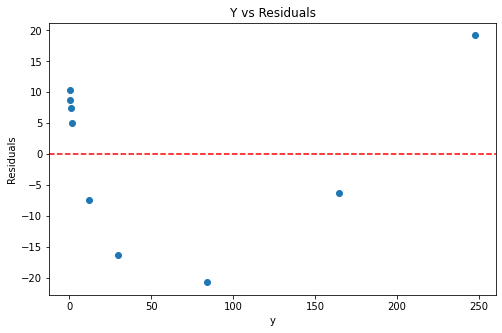

In [5]:
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('white')
plt.scatter(Ys, residuals)
plt.xlabel('y')
plt.ylabel('Residuals')
plt.title(f'Y vs Residuals')
plt.axhline(0, c='r', linestyle='--')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


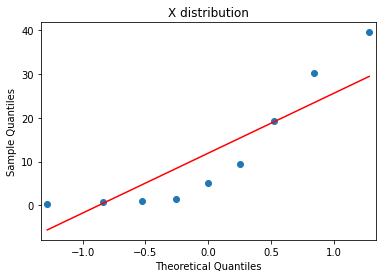

In [7]:
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

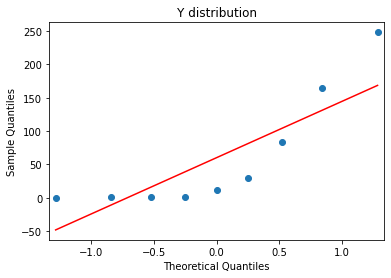

In [9]:
import statsmodels.api as sm
sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()

### Exploring transformations

In [19]:
def get_betas(Xs, Ys):
    corr = np.corrcoef(Xs, Ys).flatten()[1]
    beta_1 = corr*(np.std(Ys, ddof=1)/np.std(Xs, ddof=1))
    beta_0 = np.mean(Ys) - beta_1*np.mean(Xs)

    return beta_1, beta_0

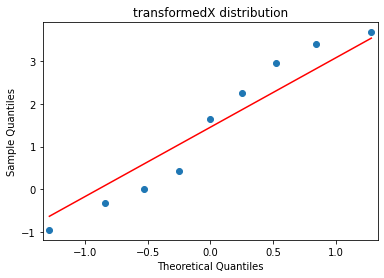

In [16]:
x_transform = np.log(Xs)

sm.qqplot(x_transform, line='s')
plt.title("transformedX distribution")
plt.show()

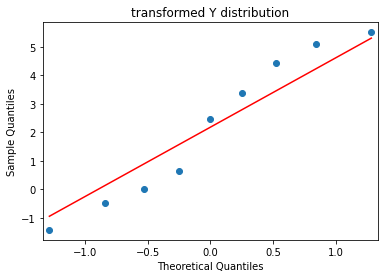

In [17]:
y_transform = np.log(Ys)

sm.qqplot(y_transform, line='s')
plt.title("transformed Y distribution")
plt.show()

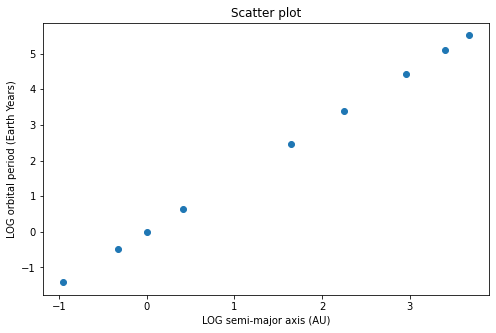

In [23]:
corr = np.corrcoef(Xs, Ys).flatten()[1]

fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('white')
plt.scatter(x_transform, y_transform)
plt.xlabel('LOG semi-major axis (AU)')
plt.ylabel('LOG orbital period (Earth Years)')
plt.title(f'Scatter plot')
plt.show()

In [20]:
beta_1, beta_0 = get_betas(x_transform, y_transform)

y_hat =  beta_1*x_transform + beta_0
residuals = y_transform - y_hat

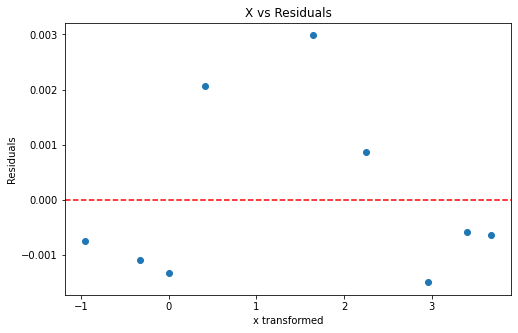

In [21]:
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('white')
plt.scatter(x_transform, residuals)
plt.xlabel('x transformed')
plt.ylabel('Residuals')
plt.title(f'X vs Residuals')
plt.axhline(0, c='r', linestyle='--')
plt.show()

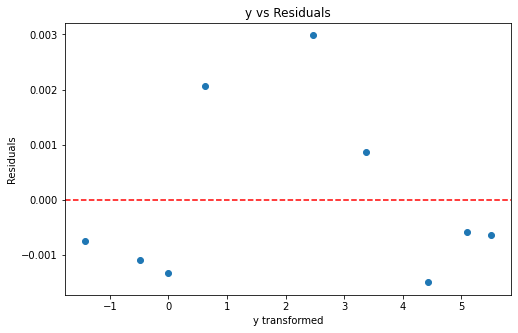

In [22]:
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('white')
plt.scatter(y_transform, residuals)
plt.xlabel('y transformed')
plt.ylabel('Residuals')
plt.title(f'y vs Residuals')
plt.axhline(0, c='r', linestyle='--')
plt.show()

In [24]:
print(f"beta_1: {beta_1:.2f}")

beta_1: 1.50
